In [1]:
%matplotlib inline
import numpy as np
from proj1_helpers import *
from implementations import *
from helpers import *
%load_ext autoreload
%autoreload 2

In [61]:


y, features, ids = load_csv_data('train.csv')
yTest , featuresTest, idsTest = load_csv_data('test.csv')
#inv = features[:,2]
#inv[inv == -999] = np.nan

#print(np.count_nonzero(np.isnan(inv)))
features, featuresTest = cleanDataSet(features, featuresTest)



In [62]:
def compute_momentum(tra_momentum, pseudo_rap, azi_angle):
    x = tra_momentum * np.cos(azi_angle)
    y = tra_momentum * np.sin(azi_angle)
    z = tra_momentum * np.sinh(pseudo_rap)
    return x, y, z



In [63]:
def compute_invariant_mass(dataset, columns_indexA, columns_indexB):
    a_x, a_y, a_z = compute_momentum(dataset[:, columns_indexA[0]], dataset[:, columns_indexA[1]], dataset[:, columns_indexA[2]])
    b_x, b_y, b_z = compute_momentum(dataset[:, columns_indexB[0]], dataset[:, columns_indexB[1]], dataset[:, columns_indexB[2]])
    
    a = np.sqrt(np.square(a_x) + np.square(a_y) + np.square(a_z))
    b = np.sqrt(np.square(b_x) + np.square(b_y) + np.square(b_z))
    
    invariant_mass = np.sqrt(np.square(a + b) - np.square(a_x + b_x) - np.square(a_y + b_y) - np.square(a_z + b_z))
    return invariant_mass


def compute_transverse_mass(dataset, columns_indexA, columns_indexB):
    a_x, a_y, a_z = compute_momentum(dataset[:, columns_indexA[0]], dataset[:, columns_indexA[1]], dataset[:, columns_indexA[2]])
    b_x, b_y, b_z = compute_momentum(dataset[:, columns_indexB[0]], dataset[:, columns_indexB[1]], dataset[:, columns_indexB[2]])
    
    a = np.sqrt(np.square(a_x) + np.square(a_y))
    b = np.sqrt(np.square(b_x) + np.square(b_y))
    
    transverse_mass = np.sqrt(np.square(a + b) - np.square(a_x + b_x) - np.square(a_y + b_y))
    return transverse_mass

In [64]:
def add_features(dataset):
    tau = [13, 14, 15]
    lep = [16, 17, 18]
    jet_lea = [23, 24, 25]
    jet_sub = [26, 27, 28]
    
    features_to_add =[]
    features_to_add.append(compute_invariant_mass(dataset, tau, jet_lea))
    features_to_add.append(compute_invariant_mass(dataset, tau, jet_sub))
    features_to_add.append(compute_invariant_mass(dataset, lep, jet_lea))
    features_to_add.append(compute_invariant_mass(dataset, lep, jet_sub))
    
    features_to_add.append(compute_transverse_mass(dataset, tau, jet_lea))
    features_to_add.append(compute_transverse_mass(dataset, tau, jet_sub))
    features_to_add.append(compute_transverse_mass(dataset, tau, lep))
    features_to_add.append(compute_transverse_mass(dataset, lep, jet_lea))
    features_to_add.append(compute_transverse_mass(dataset, lep, jet_sub))
    features_to_add.append(compute_transverse_mass(dataset, jet_sub, jet_lea))
    features_to_add = np.array(features_to_add)
    return features_to_add.transpose()
    

In [65]:
test_add_features = add_features(featuresTest)
train_add_features = add_features(features)

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in sqrt


In [66]:
train_add_features, test_add_features = cleanDataSet(train_add_features, test_add_features)

In [67]:
features = np.delete(features, [14, 15 , 17, 18, 20, 21, 24, 25, 27, 28], 1)
featuresTest = np.delete(featuresTest, [14, 15 , 17, 18, 20, 21, 24, 25, 27, 28], 1)
features = np.concatenate((features,train_add_features), 1)
featuresTest = np.concatenate((featuresTest, test_add_features), 1)

In [68]:
print(features.shape, featuresTest.shape)

(250000, 30) (568238, 30)


In [44]:
features, featuresTest = cleanDataSet(features, featuresTest)
trainX, testX, trainY, testY, index = split_data(features, yTest, 0.8)

trainX = build_poly(trainX, start=2, end=6)
testX = build_poly(testX, start=2, end=6)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(200000, 150) (50000, 150) (200000,) (50000,)


In [45]:
w, loss = ridge_regression(trainY, trainX,10**-14)
rmse_tr = np.sqrt(2*compute_mse(trainY,trainX,w))
rmse_te = np.sqrt(2*compute_mse(testY,testX,w))
print(rmse_tr,rmse_te)

0.00346354825469 0.00347260519148


In [69]:

comb = combinations(features)
comb2 = combinations(featuresTest)
print('combinations done')

features = build_poly(features, 2, 6)
featuresTest = build_poly(featuresTest, 2 ,6)
print("poly done")

features = np.concatenate((features,comb),1)
featuresTest = np.concatenate((featuresTest,comb2),1)

combinations done
poly done


(250000, 615)
[91012.25, 87658.5, 100838.0, 149308.75, 151893.0, 151845.25, 151718.75, 151225.75, 150237.25, 149348.5, 148672.5, 147796.75, 145910.75, 142430.25, 132971.0]
[30414.25, 29390.25, 33554.5, 49753.5, 50575.25, 50553.0, 50514.25, 50357.75, 50034.0, 49745.0, 49537.0, 49230.75, 48636.0, 47465.5, 44307.25]


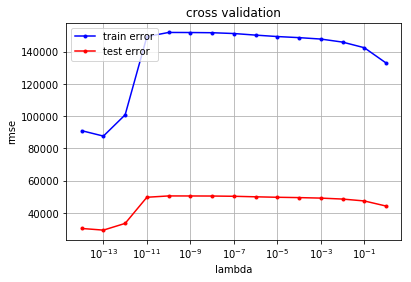

In [38]:
print(features.shape)
cross_validation_demo(y, features, np.logspace(-14,0,15))

In [70]:
lambda_ = 10**-6#0.1638
w, loss = ridge_regression(y, features, lambda_)

In [71]:
yPred = predict_labels(w,featuresTest)

In [72]:
create_csv_submission(idsTest,yPred,'prediction.csv')